# Comparative Analysis
In this notebook, we compare ClaP with competitors.

In [14]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [15]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from aeon.benchmarking import plot_critical_difference
from external.MCM import MCM
from wand.image import Image

sns.set_theme()
sns.set_color_codes()

import os
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [16]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [17]:
c1 = ["BinSeg", "DDRE", "FLUSS", "Pelt", "RuLSIF", "Window"]
c2 = ["AutoPlait", "CLaP", "GGS", "HDP-HSMM", "TICC", "Time2State", "ClaSP2Feat"]

datasets = ["TSSB", "UTSA", "HAS"] #    
methods, dfs = list(), list()

for candidate_name in c1:
    methods.append((candidate_name, "segmentation", f"{candidate_name}.csv.gz"))
    
for candidate_name in c2:
    methods.append((candidate_name, "state_detection", f"{candidate_name}.csv.gz"))

for idx, (name, comp_type, file_name) in enumerate(methods):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/{comp_type}/{d}_{file_name}", usecols=["dataset", eval_score], compression="gzip"))
    
    df = pd.concat(df)
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))

df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores.reset_index(drop=True, inplace=True)
df_scores

,dataset,BinSeg,DDRE,FLUSS,Pelt,RuLSIF,Window,AutoPlait,CLaP,GGS,HDP-HSMM,TICC,Time2State,ClaSP2Feat
0,Adiac,0.303,0.325,0.430,0.303,0.358,0.303,0.303,0.971,0.303,0.712,0.303,0.246,0.807
1,ArrowHead,0.500,0.219,0.995,0.500,0.199,0.500,0.500,0.985,0.500,0.673,0.472,0.475,0.985
2,Beef,0.500,0.678,0.935,0.500,0.633,0.500,0.491,0.973,0.500,0.677,0.471,0.326,0.973
3,BeetleFly,0.652,0.150,0.500,0.652,0.178,0.500,0.500,0.975,0.500,0.393,0.794,0.254,0.975
4,BirdChicken,0.500,0.258,0.500,0.500,0.280,0.500,0.500,0.994,0.500,0.404,0.731,0.457,0.994
5,CBF,0.342,0.537,0.861,0.342,0.621,0.342,0.342,0.979,0.342,0.583,0.496,0.354,0.979
6,Cane,0.937,0.517,0.741,0.937,0.413,0.935,0.507,0.778,0.507,0.205,0.337,0.146,0.778
7,Car,0.256,0.411,0.256,0.256,0.353,0.256,0.256,0.742,0.256,0.769,0.643,0.616,0.742
8,Chinatown,1.000,0.333,0.704,1.000,0.412,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
9,ChlorineConcentration,0.577,0.046,0.577,0.577,0.056,0.577,0.577,0.577,0.578,0.137,0.563,0.103,0.577


Let's calculate the mean/median/std score.

In [18]:
df_scores.iloc[:,1:].mean(axis=0).sort_values(ascending=False).round(3)

ClaSP2Feat    0.743
CLaP          0.743
Window        0.581
TICC          0.557
GGS           0.549
FLUSS         0.534
BinSeg        0.502
Pelt          0.479
AutoPlait     0.465
Time2State    0.447
DDRE          0.387
RuLSIF        0.383
HDP-HSMM      0.358
dtype: float64

In [19]:
df_scores.iloc[:,1:].median(axis=0).sort_values(ascending=False).round(3)

ClaSP2Feat    0.796
CLaP          0.795
Window        0.550
GGS           0.517
TICC          0.507
FLUSS         0.500
BinSeg        0.486
Pelt          0.440
Time2State    0.408
AutoPlait     0.397
RuLSIF        0.375
DDRE          0.373
HDP-HSMM      0.346
dtype: float64

In [20]:
df_scores.iloc[:,1:].std(axis=0).sort_values().round(3)

HDP-HSMM      0.199
RuLSIF        0.204
DDRE          0.208
Window        0.219
ClaSP2Feat    0.230
CLaP          0.231
Time2State    0.231
BinSeg        0.236
Pelt          0.237
TICC          0.246
GGS           0.246
AutoPlait     0.263
FLUSS         0.275
dtype: float64

Let's compute the wins per method.

In [21]:
ranks = df_scores.iloc[:,1:].rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))
args = np.argsort(means)

In [22]:
for mean, name in zip(means[args], df_scores.columns[1:].to_numpy()[args]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

CLaP:wins=169 rank=2.8
ClaSP2Feat:wins=165 rank=2.9
Window:wins=72 rank=4.8
GGS:wins=58 rank=5.7
FLUSS:wins=56 rank=6.1
TICC:wins=64 rank=6.1
BinSeg:wins=26 rank=6.8
AutoPlait:wins=47 rank=7.1
Time2State:wins=28 rank=7.4
Pelt:wins=24 rank=7.4
DDRE:wins=7 rank=8.5
RuLSIF:wins=8 rank=8.7
HDP-HSMM:wins=9 rank=9.5


Let's plot the CD diagram.

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_2480/1943414694.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figures/cd_segmentation_comparative_combined.pdf", bbox_inches="tight")
/Users/ermshaua/miniconda3/envs/clap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


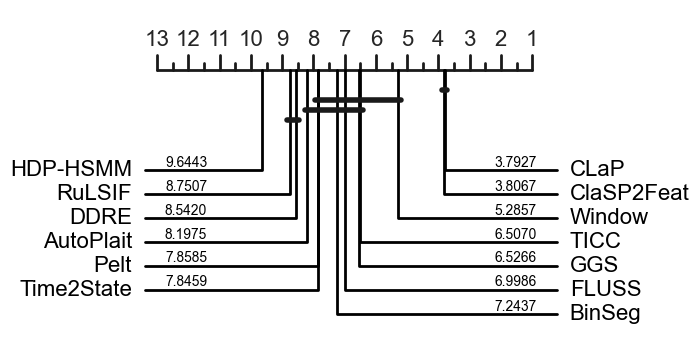

In [23]:
ax = plot_critical_difference(
    scores=df_scores.iloc[:, 1:].to_numpy(),
    labels=df_scores.columns[1:].to_numpy(),
    errors=False,
    clique_method="holm",
    alpha=0.05,
)

plt.savefig("../../figures/cd_segmentation_comparative_combined.pdf", bbox_inches="tight")

 Let's plot the MCM.

Processing ClaSP2Feat, Time2State:   0%|          | 0/13 [00:00<?, ?it/s]


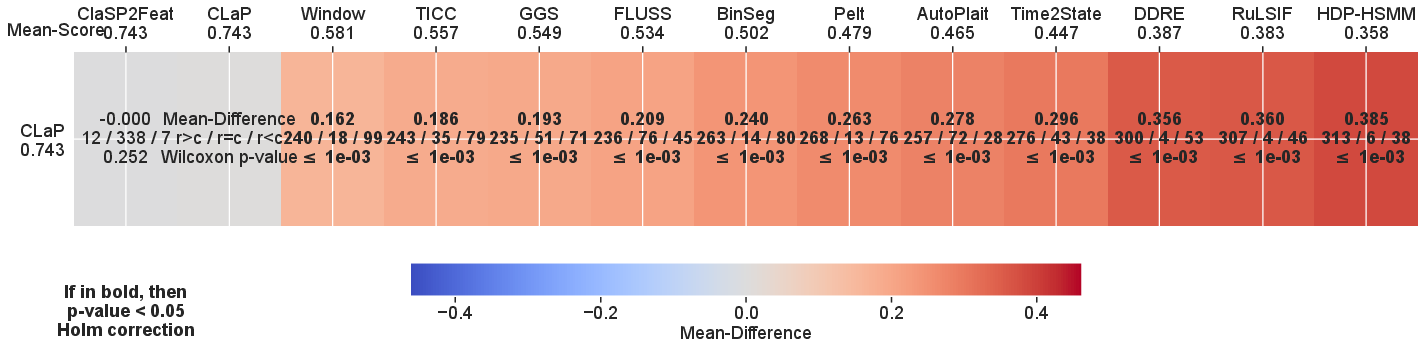

In [24]:
dir_path = "../../figures/"
file_name = "mcm_segmentation_comparative_combined"

MCM.compare(
    output_dir=dir_path,
    used_statistic="Score",
    save_as_json=False,
    df_results=df_scores.iloc[:, 1:],
    pdf_savename=file_name,
    load_analysis=False,
    pvalue_correction="Holm",
    row_comparates=("CLaP",),
    fig_size=(20,5),
    font_size=18,
    precision=3
)
Image(filename=os.path.join(dir_path, file_name + ".pdf"))

Let's compute wins/losses against ClaSP.

In [25]:
selection = "CLaP"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

CLaP vs BinSeg: (wins/ties/losses): 263/14/80
CLaP vs DDRE: (wins/ties/losses): 300/4/53
CLaP vs FLUSS: (wins/ties/losses): 236/76/45
CLaP vs Pelt: (wins/ties/losses): 268/13/76
CLaP vs RuLSIF: (wins/ties/losses): 307/4/46
CLaP vs Window: (wins/ties/losses): 240/18/99
CLaP vs AutoPlait: (wins/ties/losses): 257/72/28
CLaP vs GGS: (wins/ties/losses): 235/51/71
CLaP vs HDP-HSMM: (wins/ties/losses): 313/6/38
CLaP vs TICC: (wins/ties/losses): 243/35/79
CLaP vs Time2State: (wins/ties/losses): 276/43/38
CLaP vs ClaSP2Feat: (wins/ties/losses): 12/338/7


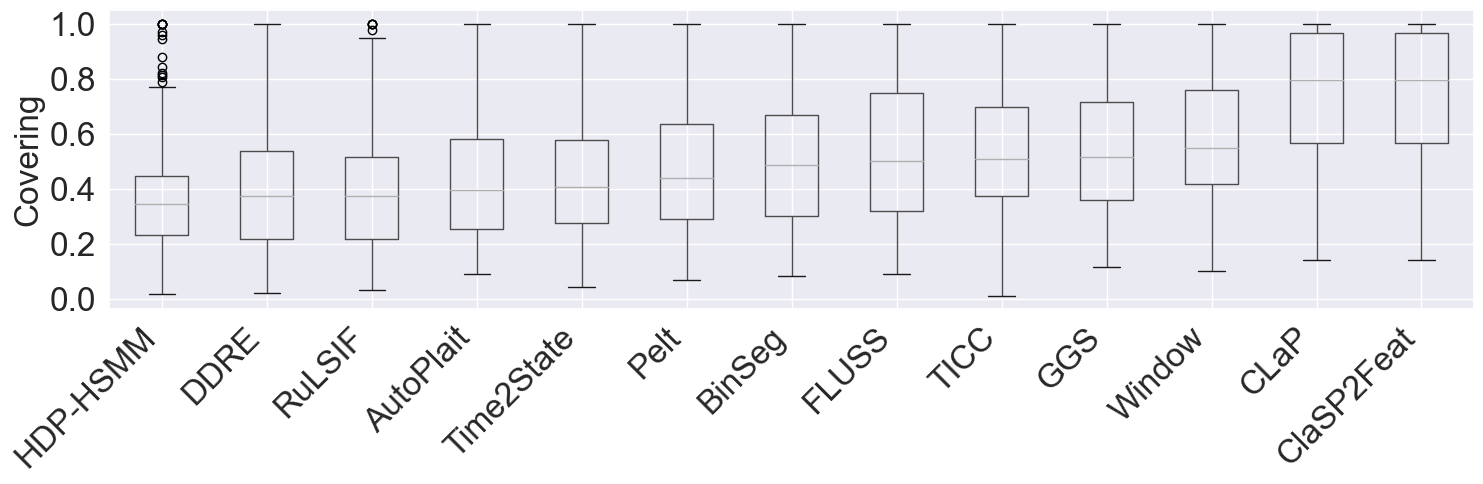

In [26]:
fontsize = 24
_, ax = plt.subplots(figsize=(15, 5))

# sort by median performance
df_sorted_scores = df_scores[df_scores.iloc[:, 1:].median(axis=0).sort_values().index]

df_sorted_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xticklabels(df_sorted_scores.columns, rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_segmentation_comparative_combined.pdf", bbox_inches="tight")